<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Tensorflow_learning_at_Udacity/blob/master/6_hand_writing_classification_mnist_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import TensorFlow
import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Helper libraries
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again

#tf.enable_eager_execution()  


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print('x_train.shape is:',x_train.shape,'y_train.shape is:',y_train.shape,'x_test.shape is:',x_test.shape,'y_test.shape is:',y_test.shape)


11493376/11490434 [==============================] - 0s 0us/step
x_train.shape is: (60000, 28, 28) y_train.shape is: (60000,) x_test.shape is: (10000, 28, 28) y_test.shape is: (10000,)


In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five',      'Six',   'Seven',  'Eight',   'Nine']

## Preprocess the data

The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [ ]:
train_dataset =  x_train / 255
test_dataset  =  x_test / 255

### Explore the processed data

Let's plot an image to see what it looks like.

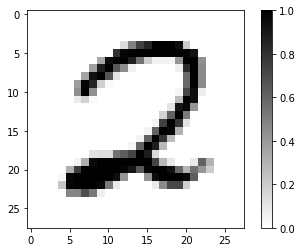

In [ ]:
# Take a single image, and remove the color dimension by reshaping
image = test_dataset[35]
#image = image.reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

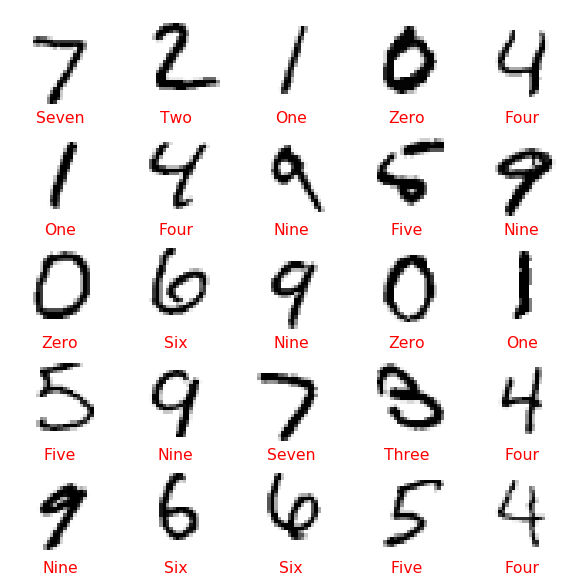

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.3)
i = 0
for i in range(25):
    image = test_dataset[i]
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]], color='red')
    i += 1
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

This network has four layers:

* **input** `tf.keras.layers.Flatten` — This layer transforms the images from a 2d-array of 28 $\times$ 28 pixels, to a 1d-array of 784 pixels (28\*28). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

* **"hidden"** `tf.keras.layers.Dense`— A densely connected layer of 256 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

* **"hidden_layer_2"** `tf.keras.layers.Dense`— A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 256 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.


* **output** `tf.keras.layers.Dense` — A 10-node *softmax* layer, with each node representing a class of clothing. As in the previous layer, each node takes input from the 128 nodes in the layer before it. Each node weights the input according to learned parameters, and then outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 10 * 60000 = 300000 examples.
4. But we will use a callback method that stops training when the model achieves 99.6% accuracy

(Don't worry about `steps_per_epoch`, the requirement to have this flag will soon be removed.)

In [ ]:
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc')>=0.995:
            print('\n99.5% accuracy reached...Terminating training!')
            self.model.stop_training=True

In [ ]:
model.fit(train_dataset, y_train, epochs=15, callbacks=[callbacks()])

Epoch 1/15
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2033 - acc: 0.9389
Epoch 2/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0857 - acc: 0.9737
Epoch 3/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0585 - acc: 0.9814
Epoch 4/15
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0444 - acc: 0.9852
Epoch 5/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0332 - acc: 0.9889
Epoch 6/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0279 - acc: 0.9911
Epoch 7/15
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0239 - acc: 0.9920
Epoch 8/15
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0205 - acc: 0.9930
Epoch 9/15
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0175 - acc: 0.9942
Epoch 10/15
60000/60000 [==============================] - 6s 106us/sampl

## Evaluate accuracy

Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [ ]:
testloss, test_accuracy = model.evaluate(test_dataset, y_test)
print('Accuracy on test dataset:', test_accuracy,'While loss is',testloss)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.1101 - acc: 0.9783
Accuracy on test dataset: 0.9783 While loss is 0.11009945926498367


This time we got 98% accuracy on test data

## Let's make some predictions

In [ ]:
predictions = model.predict(test_dataset)

In [ ]:
def plot_image(num, prediction, label):
    num = (num // 10) * 10
    plt.figure(figsize=(num*0.1 , num*0.1))
    sns.set(font_scale=1.3)
    i = 0
    for i in range(num):
        max = np.argmax(prediction[i])
        plt.subplot(10, num // 10,i+1)
        if max == label[i]:
            image = test_dataset[i]
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(image, cmap=plt.cm.Blues)
            plt.xlabel(class_names[y_test[i]], color='navy')
            i += 1
            
        elif max != label[i]:
            image = test_dataset[i]
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(image, cmap=plt.cm.Reds)
            plt.xlabel(class_names[max], color='red')
            i += 1
    plt.show()
   

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

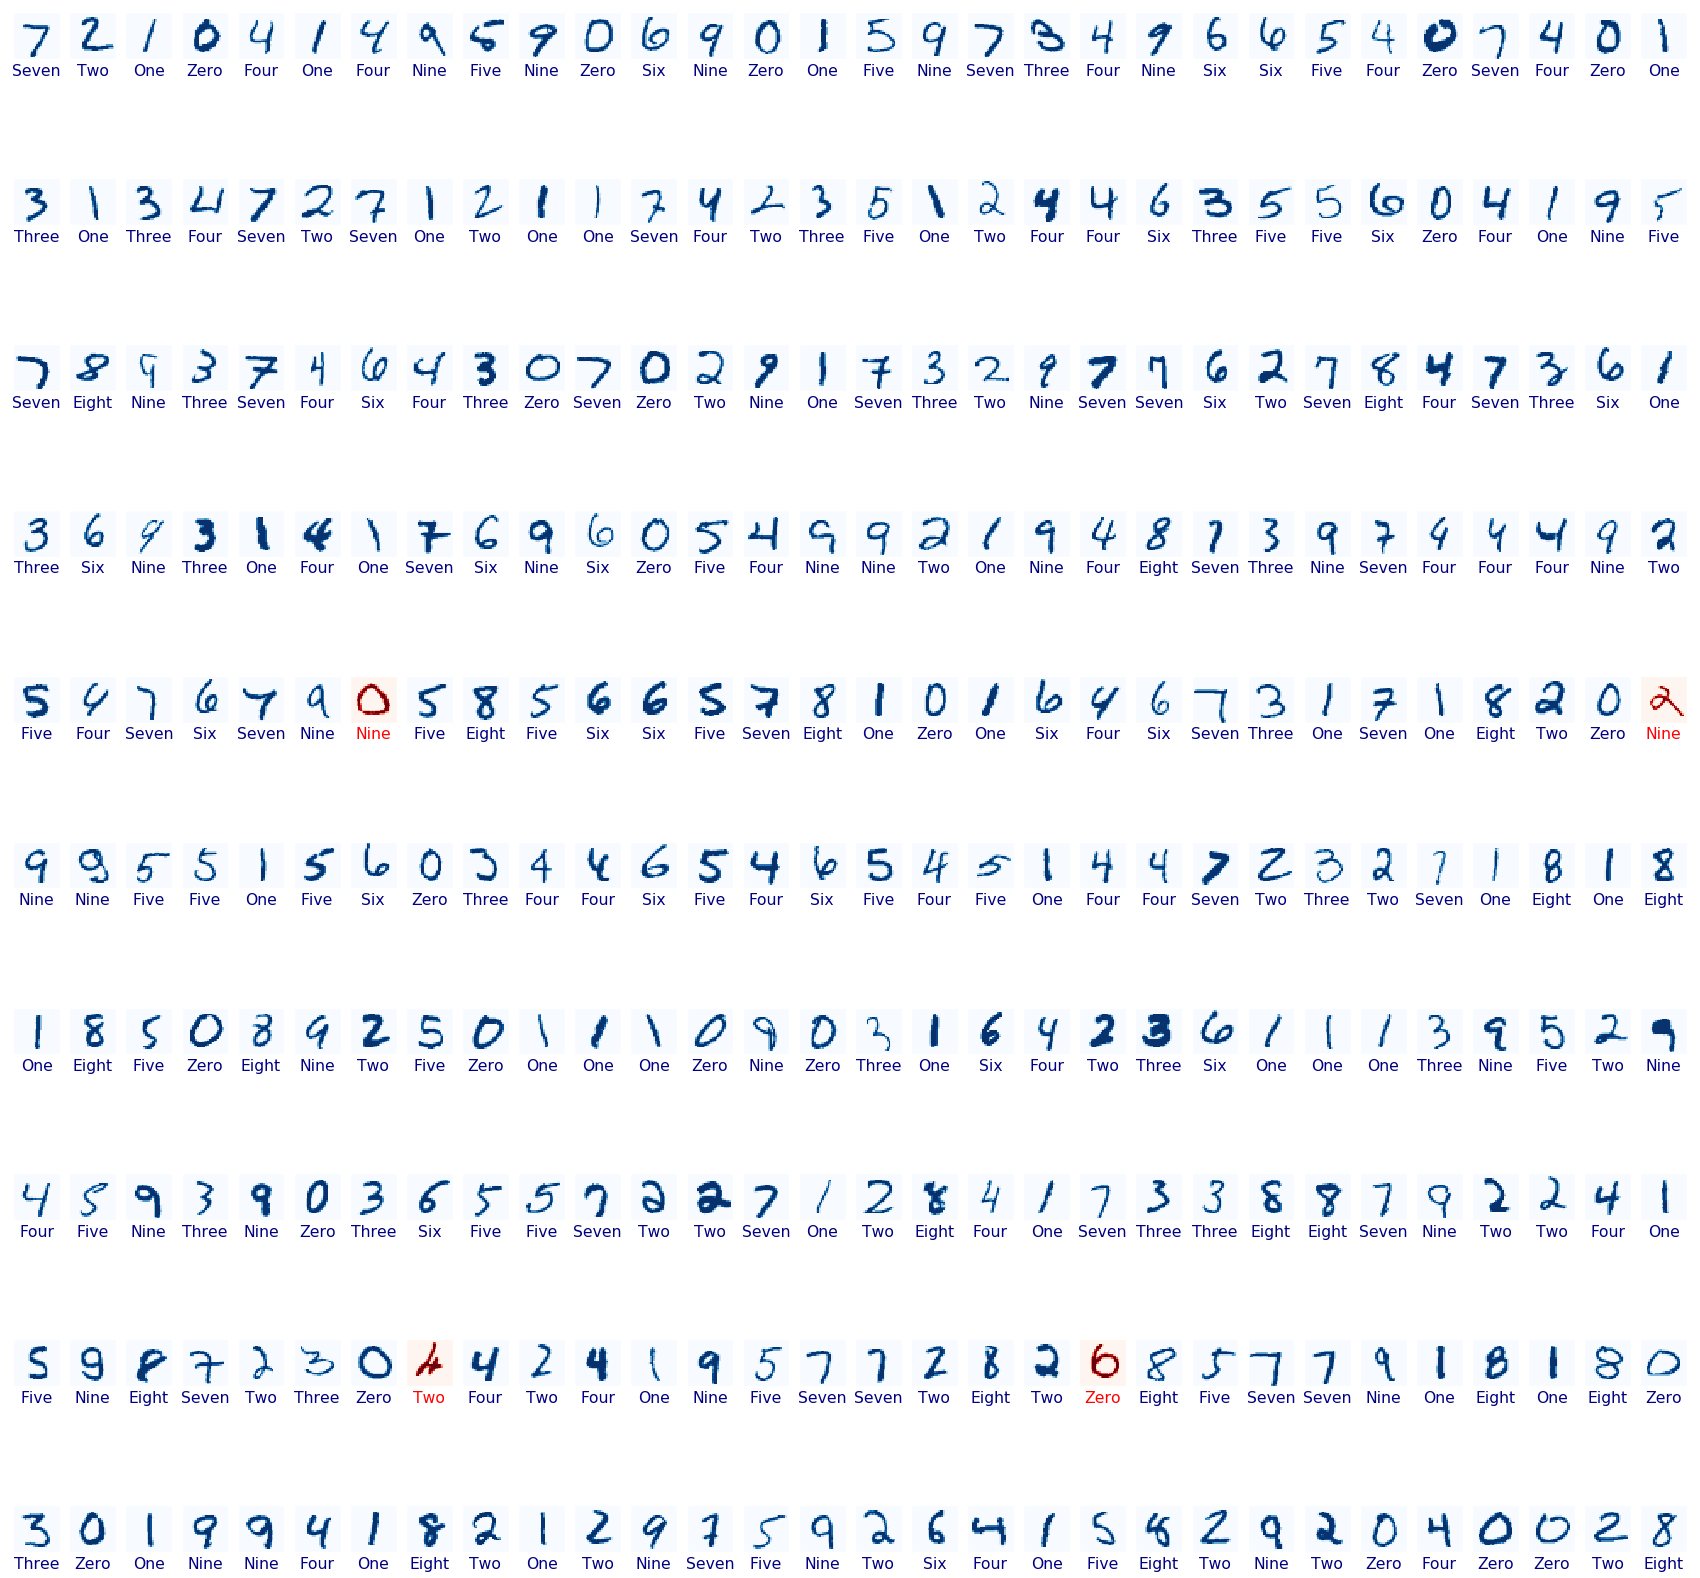

In [ ]:
plot_image(300, predictions, y_test)

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)